# 3 layer Conv, dropout. 30 day input, 7 day forecast

In [10]:
import numpy as np
import pandas as pd
import json
import os
import math
import datetime as dt
import matplotlib.pyplot as plt
from numpy import newaxis
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout, LSTM, CuDNNLSTM, BatchNormalization, RepeatVector, TimeDistributed, Conv1D, MaxPooling1D, Flatten
from keras.models import Sequential, load_model
from sklearn.metrics import mean_squared_error

import utils
import model_funcs

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = [10, 5]
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
save_dir = 'models/lstm1'
df = pd.read_csv('data_25_normalized.csv', index_col='Date')
data = df.values

In [3]:
num_input = 30
num_out = 7
train_X, train_y, dev_X, dev_y, test_X, test_y, y = utils.prepare_data(data, num_input, num_preds=num_out)

# train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
# dev_y = dev_y.reshape((dev_y.shape[0], dev_y.shape[1], 1))
# test_y = test_y.reshape((test_y.shape[0], test_y.shape[1], 1))

print("train_X shape", train_X.shape)
print("train_y shape", train_y.shape)
print("dev_X shape", dev_X.shape)
print("dev_y shape", dev_y.shape)
print("test_X shape", test_X.shape)
print("test_y shape", test_y.shape)

train_X shape (638, 30, 25)
train_y shape (638, 7)
dev_X shape (80, 30, 25)
dev_y shape (80, 7)
test_X shape (80, 30, 25)
test_y shape (80, 7)


In [4]:
if not os.path.exists(save_dir): os.makedirs(save_dir)

input_shape = train_X.shape[1:]
lr = 0.001
decay = 1e-6
dropout_rate = 0.3
epochs = 200
batch_size = 32

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='linear', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))

model.add(Conv1D(filters=96, kernel_size=3, activation='linear'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=3, activation='linear'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_out))


opt = Adam(lr=lr, decay=decay)
model.compile(loss="mse", optimizer=opt)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 28, 64)            4864      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 64)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 26, 96)            18528     
_________________________________________________________________
batch_normalization_2

In [5]:
history = model_funcs.train(
    model,
    train_X,
    train_y,
    (dev_X, dev_y),
    epochs = epochs,
    batch_size = batch_size,
    save_dir = save_dir
)

[Model] Training Started
[Model] 200 epochs, 32 batch size
Instructions for updating:
Use tf.cast instead.
Train on 638 samples, validate on 80 samples
Epoch 1/200
638/638 [==============================] - 2s 3ms/step - loss: 0.4697 - val_loss: 0.0411
Epoch 2/200
638/638 [==============================] - 0s 346us/step - loss: 0.0766 - val_loss: 0.0150
Epoch 3/200
638/638 [==============================] - 0s 347us/step - loss: 0.0463 - val_loss: 0.0106
Epoch 4/200
638/638 [==============================] - 0s 346us/step - loss: 0.0320 - val_loss: 0.0060
Epoch 5/200
638/638 [==============================] - 0s 347us/step - loss: 0.0244 - val_loss: 0.0058
Epoch 6/200
638/638 [==============================] - 0s 353us/step - loss: 0.0181 - val_loss: 0.0054
Epoch 7/200
638/638 [==============================] - 0s 351us/step - loss: 0.0138 - val_loss: 0.0059
Epoch 8/200
638/638 [==============================] - 0s 342us/step - loss: 0.0132 - val_loss: 0.0047
Epoch 9/200
638/638 [=====

638/638 [==============================] - 0s 342us/step - loss: 0.0018 - val_loss: 0.0053
Epoch 155/200
638/638 [==============================] - 0s 343us/step - loss: 0.0014 - val_loss: 0.0048
Epoch 156/200
638/638 [==============================] - 0s 345us/step - loss: 0.0016 - val_loss: 0.0049
Epoch 157/200
638/638 [==============================] - 0s 345us/step - loss: 0.0014 - val_loss: 0.0045
Epoch 158/200
638/638 [==============================] - 0s 348us/step - loss: 0.0015 - val_loss: 0.0050
Epoch 159/200
638/638 [==============================] - 0s 343us/step - loss: 0.0015 - val_loss: 0.0047
Epoch 160/200
638/638 [==============================] - 0s 343us/step - loss: 0.0015 - val_loss: 0.0048
Epoch 161/200
638/638 [==============================] - 0s 345us/step - loss: 0.0015 - val_loss: 0.0045
Epoch 162/200
638/638 [==============================] - 0s 344us/step - loss: 0.0015 - val_loss: 0.0048
Epoch 163/200
638/638 [==============================] - 0s 349us/ste

<IPython.core.display.Javascript object>


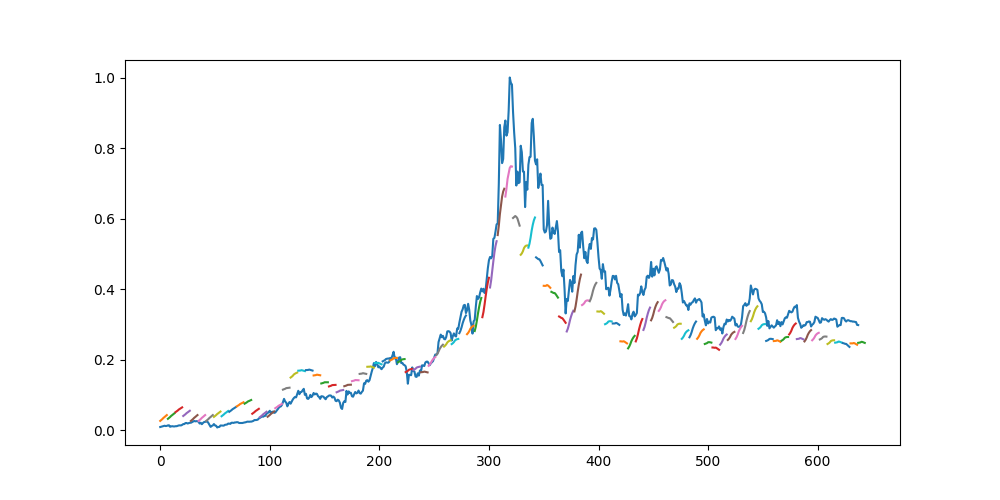

In [12]:
predicted_train = model.predict(train_X).squeeze()
predicted_train = predicted_train[::num_out]
true_train = train_y[:, 0].reshape(-1,1)
utils.plot_results_multiple(predicted_train.tolist(), true_train, num_out)

<IPython.core.display.Javascript object>


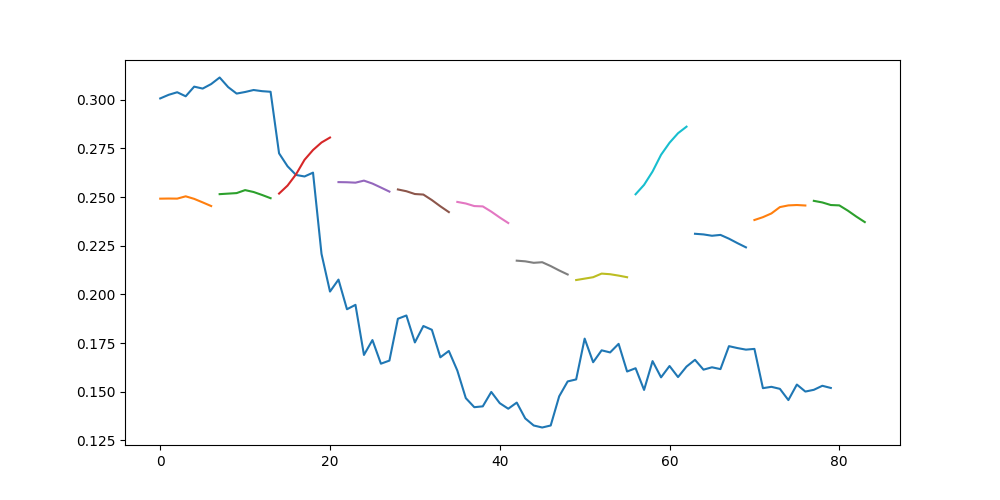

In [13]:
predicted_dev = model.predict(dev_X).squeeze()
predicted_train = predicted_train.reshape(predicted_train.shape[0], -1)
predicted_dev = predicted_dev[::num_out]
true_dev = dev_y[:, 0].reshape(-1,1)
utils.plot_results_multiple(predicted_dev.tolist(), true_dev, num_out)

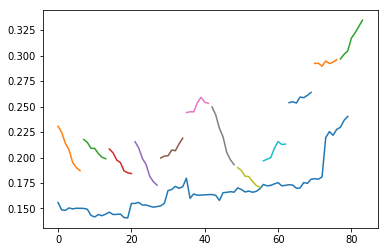

In [8]:
predicted_test = model.predict(test_X).squeeze()
predicted_test = predicted_test[::num_out]
true_test = test_y[:, 0].reshape(-1,1)
utils.plot_results_multiple(predicted_test.tolist(), true_test, num_out)

In [9]:
print("MSE Train:", mean_squared_error(predicted_train.reshape(-1,1)[:len(true_train)], true_train))
print("MSE Dev:", mean_squared_error(predicted_dev.reshape(-1,1)[:len(true_dev)], true_dev))
print("MSE Test:", mean_squared_error(predicted_test.reshape(-1,1)[:len(true_test)], true_test))

MSE Train: 0.007959841265032724
MSE Dev: 0.006955283880119957
MSE Test: 0.0037446863261283367


In [10]:
print("Acc Train:", utils.direction_accuracy(predicted_train.reshape(-1,1)[:len(true_train)], true_train))
print("Acc Dev:", utils.direction_accuracy(predicted_dev.reshape(-1,1)[:len(true_dev)], true_dev))
print("Acc Test:", utils.direction_accuracy(predicted_test.reshape(-1,1)[:len(true_test)], true_test))

Acc Train: 0.5494505494505495
Acc Dev: 0.4936708860759494
Acc Test: 0.5569620253164557


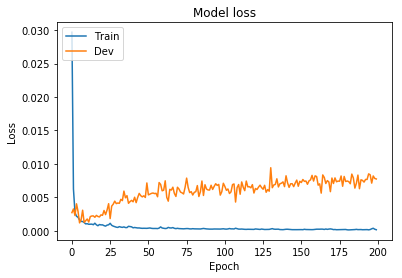

In [19]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Dev'], loc='upper left')
plt.show()